<a href="https://colab.research.google.com/github/faganvaliyev/ML/blob/main/Emotions_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/faganvaliyev/ML/main/helper_functions.py

--2024-09-15 08:59:38--  https://raw.githubusercontent.com/faganvaliyev/ML/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10247 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-09-15 08:59:38 (87.7 MB/s) - ‘helper_functions.py’ saved [10247/10247]



In [3]:
from helper_functions import unzip_data

In [4]:
!kaggle datasets download -d yousefmohamed20/sentiment-images-classifier

Dataset URL: https://www.kaggle.com/datasets/yousefmohamed20/sentiment-images-classifier
License(s): apache-2.0
 95% 108M/114M [00:01<00:00, 149MB/s] 
100% 114M/114M [00:01<00:00, 111MB/s]


In [5]:
unzip_data('/content/sentiment-images-classifier.zip')

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_dir = '/content/6 Emotions for image classification'

train_datagen = ImageDataGenerator(
    validation_split=0.2,
)

test_datagen = ImageDataGenerator( validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    directory='/content/6 Emotions for image classification',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_generator = test_datagen.flow_from_directory(
    directory='/content/6 Emotions for image classification',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 922 images belonging to 6 classes.
Found 226 images belonging to 6 classes.


In [7]:
import tensorflow as tf

tf.random.set_seed(42)

base_model =  tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.Input(shape=(224,224,3),name='input layer')

x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name = 'Global_average_pool_layer')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(6,activation='softmax',name='output_layer',kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

model = tf.keras.Model(inputs,outputs)

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(patience=3)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model.fit(train_generator,
          epochs=25,
          validation_data=test_generator,
          callbacks = early_stop)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.2260 - loss: 2.0170 - val_accuracy: 0.5664 - val_loss: 1.4519
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 260ms/step - accuracy: 0.3913 - loss: 1.6734 - val_accuracy: 0.6681 - val_loss: 1.2589
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 231ms/step - accuracy: 0.4481 - loss: 1.5374 - val_accuracy: 0.6991 - val_loss: 1.1731
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 238ms/step - accuracy: 0.5294 - loss: 1.3824 - val_accuracy: 0.7124 - val_loss: 1.1197
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 260ms/step - accuracy: 0.5729 - loss: 1.2993 - val_accuracy: 0.7168 - val_loss: 1.0780
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 280ms/step - accuracy: 0.5908 - loss: 1.2435 - val_accuracy: 0.7168 - val_loss: 1.0655
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 233ms/step - accuracy: 0.6005 - loss: 1.2078 - val_accuracy: 0.7345 - val_loss: 1.0509
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step - accuracy: 0.6159 - loss: 1.1746 - val_accuracy: 0.7212 - val_

In [9]:
model.evaluate(test_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.7097 - loss: 1.0380


[1.0172030925750732, 0.7035398483276367]

In [10]:
class_name = ['anger','disgust','fear','happy','pain','sad']

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def predict_and_plot(image_path, model, class_names):

    img = mpimg.imread(image_path)

    resized_image = cv2.resize(img, (224, 224))
    input_image = np.expand_dims(resized_image, axis=0)

    predicted = model.predict(input_image)

    bar_width = 0.5
    index = np.arange(predicted.shape[1])


    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    for i in range(predicted.shape[0]):
        axes[0].bar(index + i * bar_width, predicted[i], bar_width, label=class_names[i])

    axes[0].set_xlabel('Emotions')
    axes[0].set_ylabel('Probability')
    axes[0].set_xticks(index + bar_width, ['anger', 'disgust', 'fear', 'happy', 'pain', 'sad'], rotation=90)
    axes[0].set_title(class_names[predicted.argmax()])


    axes[1].imshow(img)
    axes[1].axis('off')


    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


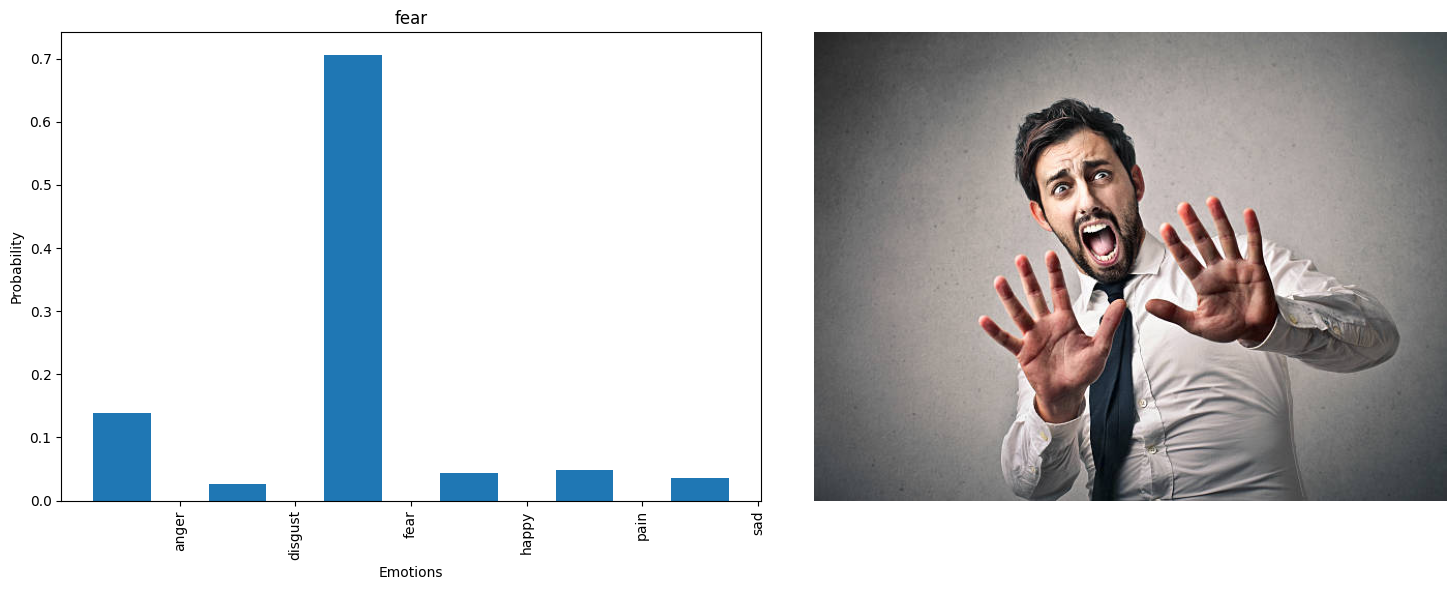

In [12]:
predict_and_plot('/content/test_1.jpg',model,class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


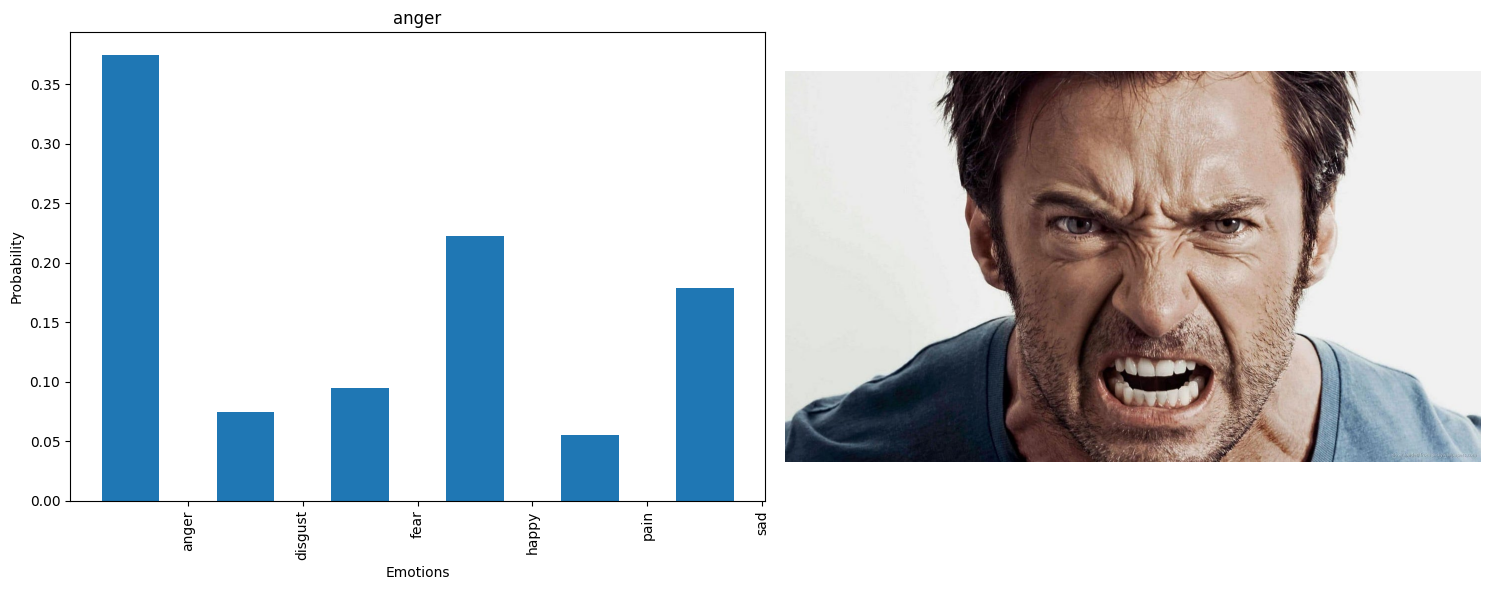

In [13]:
predict_and_plot('/content/test_2.jpg',model,class_name)